# Usage example

In [1]:
from discourseer.graph_maker import plot_kripp_alpha_and_majority_agreement
from io import StringIO
import matplotlib.pyplot as plt

import os
os.makedirs('figures', exist_ok=True)

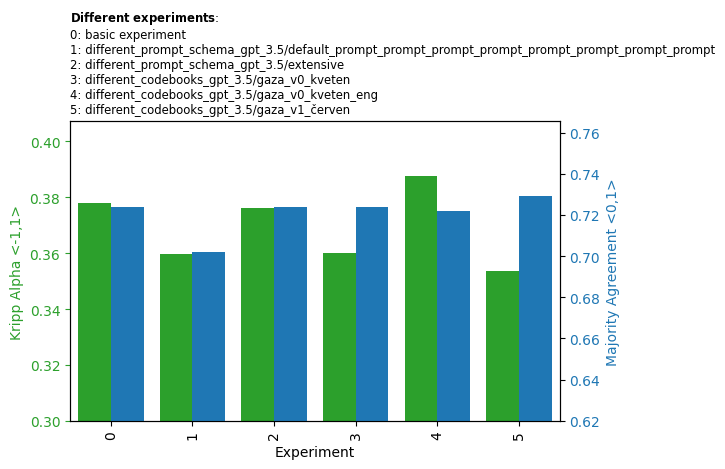

In [2]:
data = StringIO("""basic experiment	0.3780	0.724
different_prompt_schema_gpt_3.5/default_prompt_prompt_prompt_prompt_prompt_prompt_prompt_prompt	0.3598	0.702
different_prompt_schema_gpt_3.5/extensive	0.3760	0.724
different_codebooks_gpt_3.5/gaza_v0_kveten	0.3600	0.724
different_codebooks_gpt_3.5/gaza_v0_kveten_eng	0.3878	0.722
different_codebooks_gpt_3.5/gaza_v1_červen	0.3538	0.729""")

plot_kripp_alpha_and_majority_agreement(data, title='Different experiments', to_file='figures/kripp_alpha_and_majority_agreement.png')
plt.show()

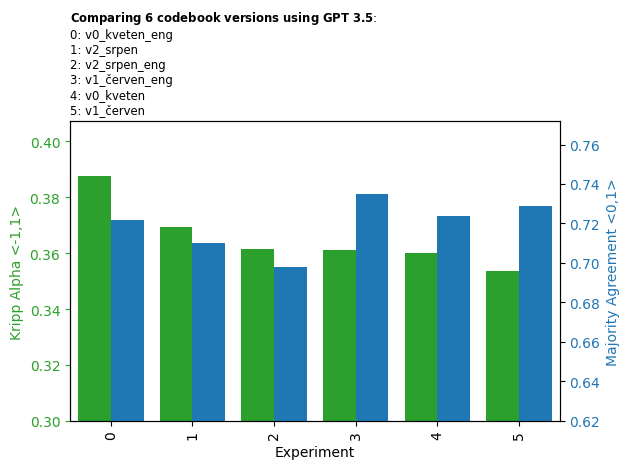

In [3]:
data = StringIO("""v0_kveten	0.3600	0.724
v0_kveten_eng	0.3878	0.722
v1_červen	0.3538	0.729
v1_červen_eng	0.3610	0.735
v2_srpen	0.3693	0.710
v2_srpen_eng	0.3615	0.698""")

plot_kripp_alpha_and_majority_agreement(data, title='Comparing 6 codebook versions using GPT 3.5', to_file='figures/codebooks_with_GPT_3.5.png', sort_by_alpha=True)
plt.show()

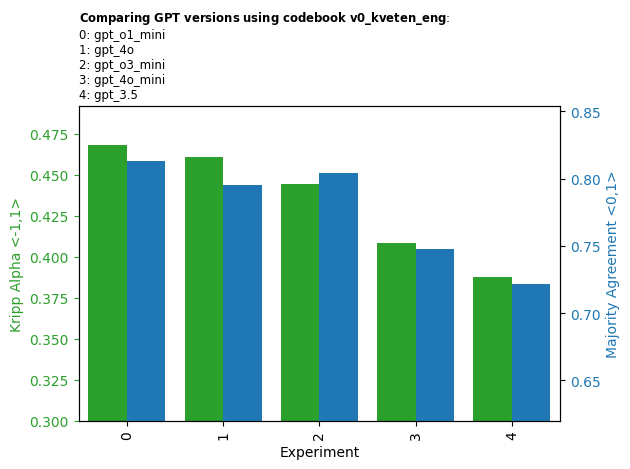

In [4]:
data = StringIO("""gpt_3.5	0.3878	0.722
gpt_4o_mini	0.4083	0.748
gpt_o1_mini	0.4683	0.813
gpt_o3_mini	0.4446	0.804
gpt_4o	0.4611	0.795""")

plot_kripp_alpha_and_majority_agreement(data, title='Comparing GPT versions using codebook v0\_kveten\_eng', to_file='figures/GPT_versions.png', sort_by_alpha=True)
plt.show()

In [5]:
# deleted for redundancy
# data = StringIO("""with_examples_default_prompt	0.3443	0.688
# without_examples_default_prompt	0.3640	0.710
# with_examples_extensive_prompt	0.3636	0.718
# without_examples_extensive_prompt	0.3674	0.716""")

# plot_kripp_alpha_and_majority_agreement(data, title='Comparing GPT 3.5 with and without examples (codebook v2\_srpen)', to_file='figures/with_and_without_examples.png', sort_by_alpha=True)
# plt.show()

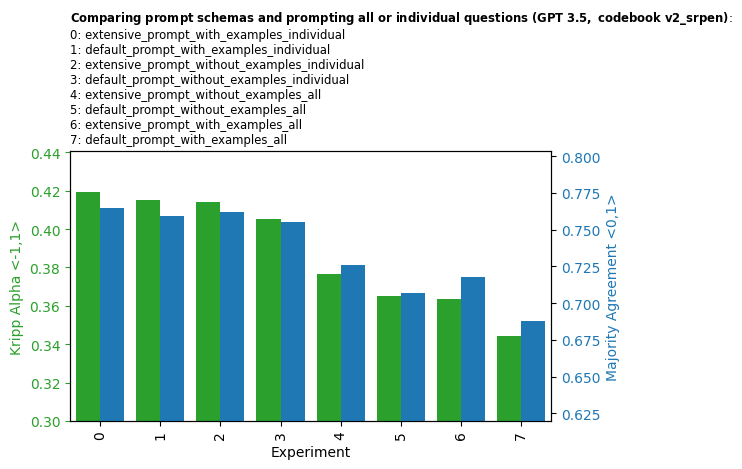

In [6]:
data = StringIO("""
default_prompt_without_examples_all	0.3649	0.707
default_prompt_without_examples_individual	0.4051	0.755
extensive_prompt_without_examples_all	0.3768	0.726
extensive_prompt_without_examples_individual	0.4143	0.762
default_prompt_with_examples_individual	0.4152	0.759
extensive_prompt_with_examples_individual	0.4196	0.765
default_prompt_with_examples_all	0.3443	0.688
extensive_prompt_with_examples_all	0.3636	0.718
""")

# THIS is with english codebook v2_srpen_eng
# default_prompt_all	0.3664	0.701
# default_prompt_individual	0.3900	0.724
# extensive_prompt_all	0.3734	0.711
# extensive_prompt_individual	0.4166	0.732

plot_kripp_alpha_and_majority_agreement(data, title='Comparing prompt schemas and prompting all or individual questions (GPT 3.5, codebook v2\_srpen)', to_file='figures/prompt_schemas_and_question_individual.png', sort_by_alpha=True)
plt.show()

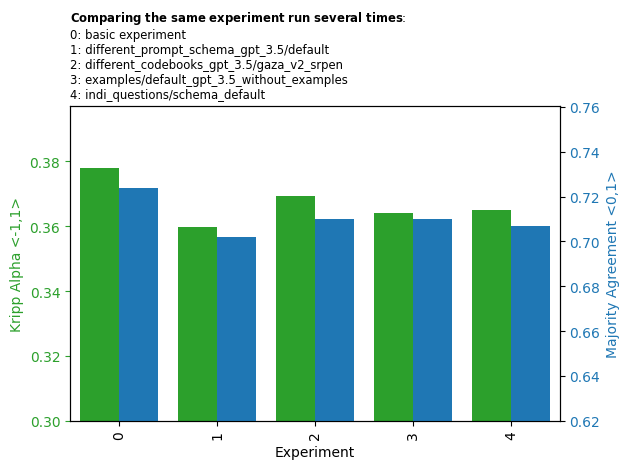

In [7]:
data = StringIO("""
basic experiment	0.3780	0.724
different_prompt_schema_gpt_3.5/default	0.3598	0.702
different_codebooks_gpt_3.5/gaza_v2_srpen	0.3693	0.710
examples/default_gpt_3.5_without_examples	0.3640	0.710
indi_questions/schema_default	0.3649	0.707
""")

plot_kripp_alpha_and_majority_agreement(data, title='Comparing the same experiment run several times', to_file='figures/same_experiment_different_runs.png')
plt.show()